In [2]:
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [66]:
X = mnist.data
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [67]:
feat_cols = ['pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [68]:
import numpy as np

# For reproducability of the results
np.random.seed(42)

rndperm = np.random.permutation(df.shape[0])

<Figure size 640x480 with 0 Axes>

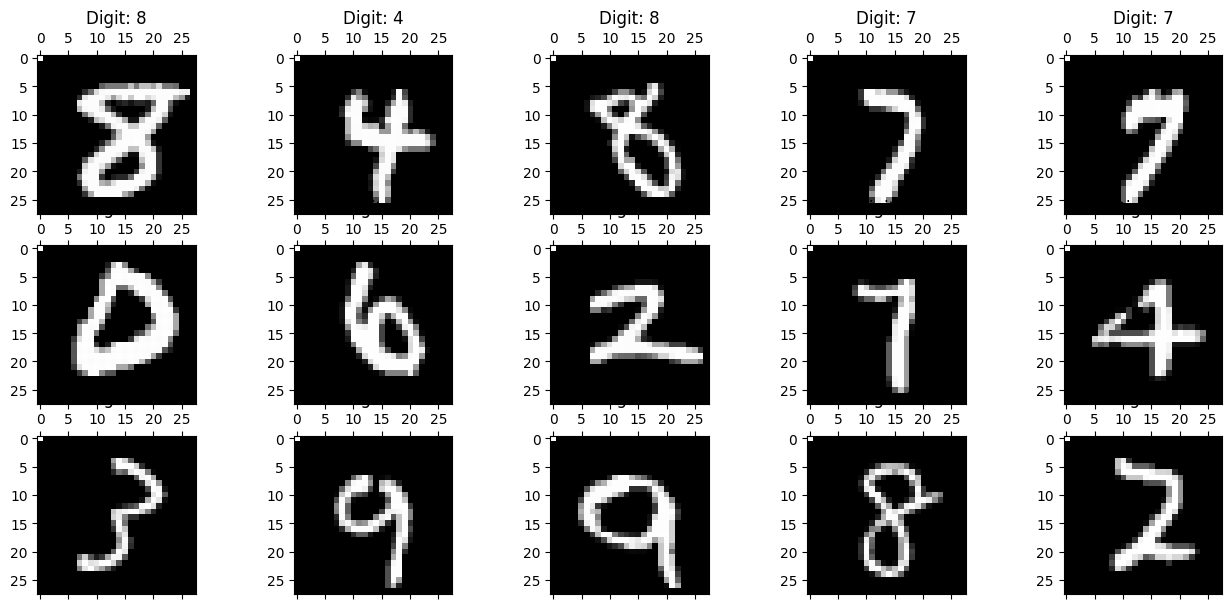

In [69]:
plt.gray()
fig = plt.figure(figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3, 5, i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    
plt.show()

In [ ]:
values = df[feat_cols].values
values_ = []
for val in values:
    values_.append([.0 if np.isnan(_) else _ for _ in val])
print(values_[0])

In [76]:
pca = PCA(n_components=3)
values = df[feat_cols[1:]].values
print(np.argwhere(np.isnan(values)))
print(type(values))
pca_result = pca.fit_transform(values)

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

[]
<class 'numpy.ndarray'>


c:\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:611: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


<Axes: xlabel='pca-one', ylabel='pca-two'>

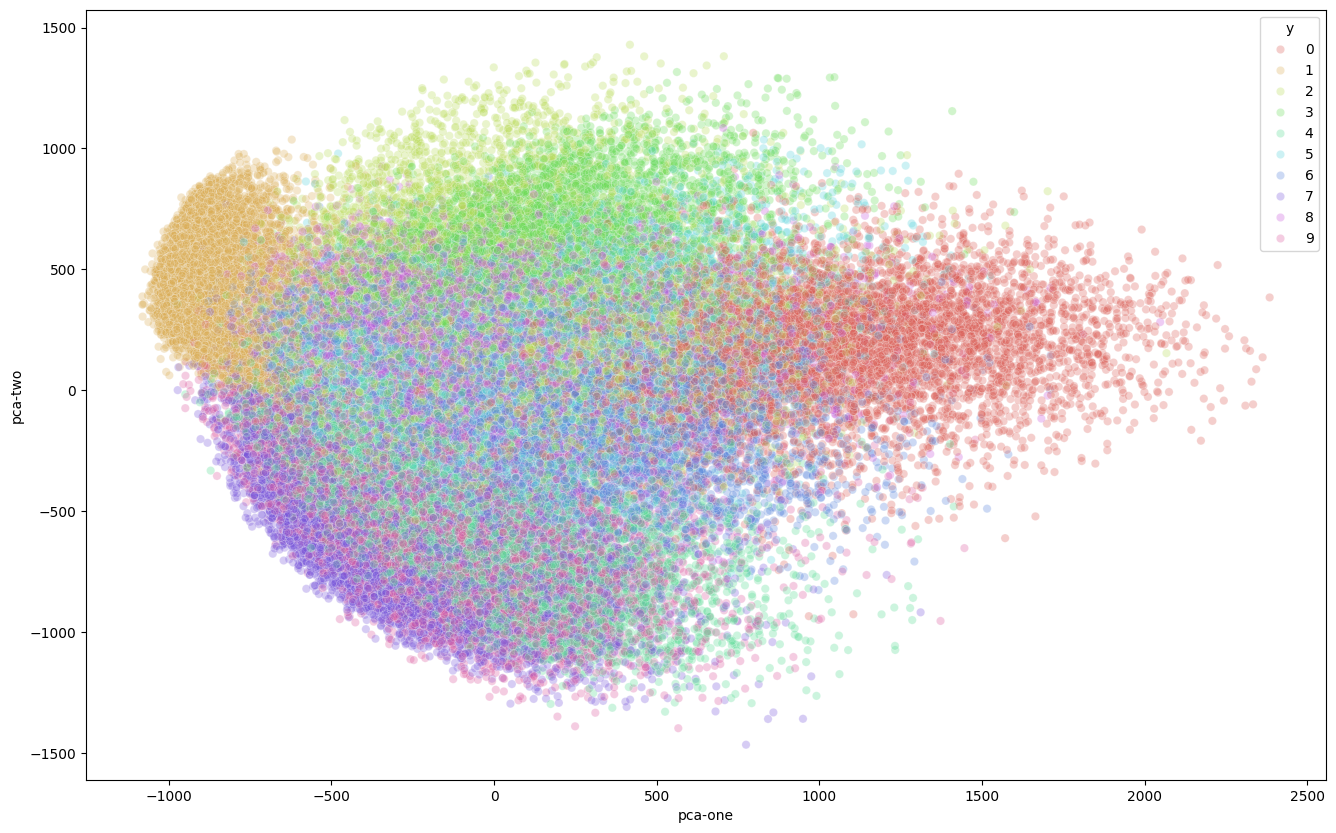

In [77]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

In [89]:
# df.loc[rndperm,:]["pca-one"]
# type(df.loc[rndperm,:]["y"])
[int(_) for _ in df.loc[rndperm,:]["y"]]


[8,
 4,
 8,
 7,
 7,
 0,
 6,
 2,
 7,
 4,
 3,
 9,
 9,
 8,
 2,
 5,
 9,
 1,
 7,
 8,
 0,
 0,
 0,
 3,
 6,
 3,
 6,
 1,
 6,
 9,
 7,
 6,
 0,
 8,
 5,
 5,
 2,
 9,
 1,
 6,
 4,
 9,
 7,
 7,
 4,
 5,
 2,
 7,
 3,
 9,
 2,
 0,
 6,
 8,
 5,
 3,
 1,
 4,
 0,
 9,
 1,
 7,
 5,
 3,
 9,
 5,
 7,
 9,
 6,
 0,
 1,
 7,
 3,
 0,
 4,
 3,
 4,
 3,
 5,
 6,
 6,
 6,
 8,
 2,
 7,
 1,
 1,
 3,
 8,
 8,
 7,
 5,
 1,
 8,
 2,
 0,
 8,
 7,
 3,
 0,
 3,
 4,
 0,
 4,
 4,
 5,
 1,
 3,
 5,
 0,
 8,
 3,
 7,
 1,
 9,
 9,
 1,
 3,
 9,
 1,
 5,
 7,
 8,
 4,
 8,
 1,
 2,
 0,
 9,
 9,
 1,
 6,
 3,
 9,
 3,
 5,
 6,
 3,
 1,
 1,
 3,
 4,
 2,
 1,
 4,
 3,
 5,
 6,
 2,
 8,
 2,
 1,
 8,
 7,
 0,
 6,
 4,
 7,
 7,
 0,
 8,
 1,
 5,
 5,
 2,
 3,
 5,
 0,
 0,
 8,
 0,
 9,
 1,
 0,
 7,
 6,
 4,
 2,
 2,
 8,
 2,
 5,
 7,
 3,
 6,
 6,
 2,
 1,
 2,
 3,
 9,
 1,
 7,
 9,
 8,
 6,
 5,
 3,
 5,
 9,
 1,
 5,
 9,
 3,
 8,
 2,
 9,
 3,
 8,
 1,
 3,
 9,
 4,
 1,
 5,
 6,
 9,
 5,
 9,
 0,
 9,
 1,
 4,
 5,
 1,
 1,
 2,
 3,
 3,
 4,
 0,
 7,
 4,
 6,
 5,
 7,
 9,
 8,
 7,
 4,
 4,
 9,
 4,
 3,
 7,
 7,
 4,
 6,
 6,
 9,


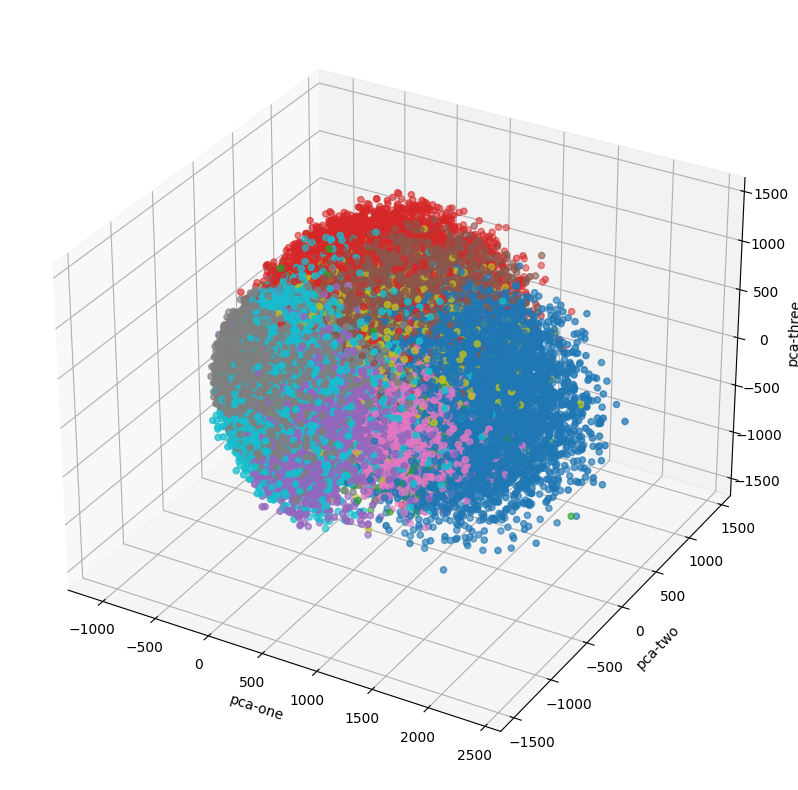

In [90]:
ax = plt.figure(figsize=(16,10)).add_subplot(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=[int(_) for _ in df.loc[rndperm,:]["y"]],
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

In [93]:
N = 10000

df_subset = df.loc[rndperm[:N],:].copy()

data_subset = df_subset[feat_cols[1:]].values

pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)

df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))


c:\Python\Python310\lib\site-packages\sklearn\decomposition\_pca.py:611: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [95]:
import time

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


c:\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 1.067s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 540.083304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.848038
[t-SNE] KL divergence after 300 iterations: 2.770828
t-SNE done! Time elapse

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

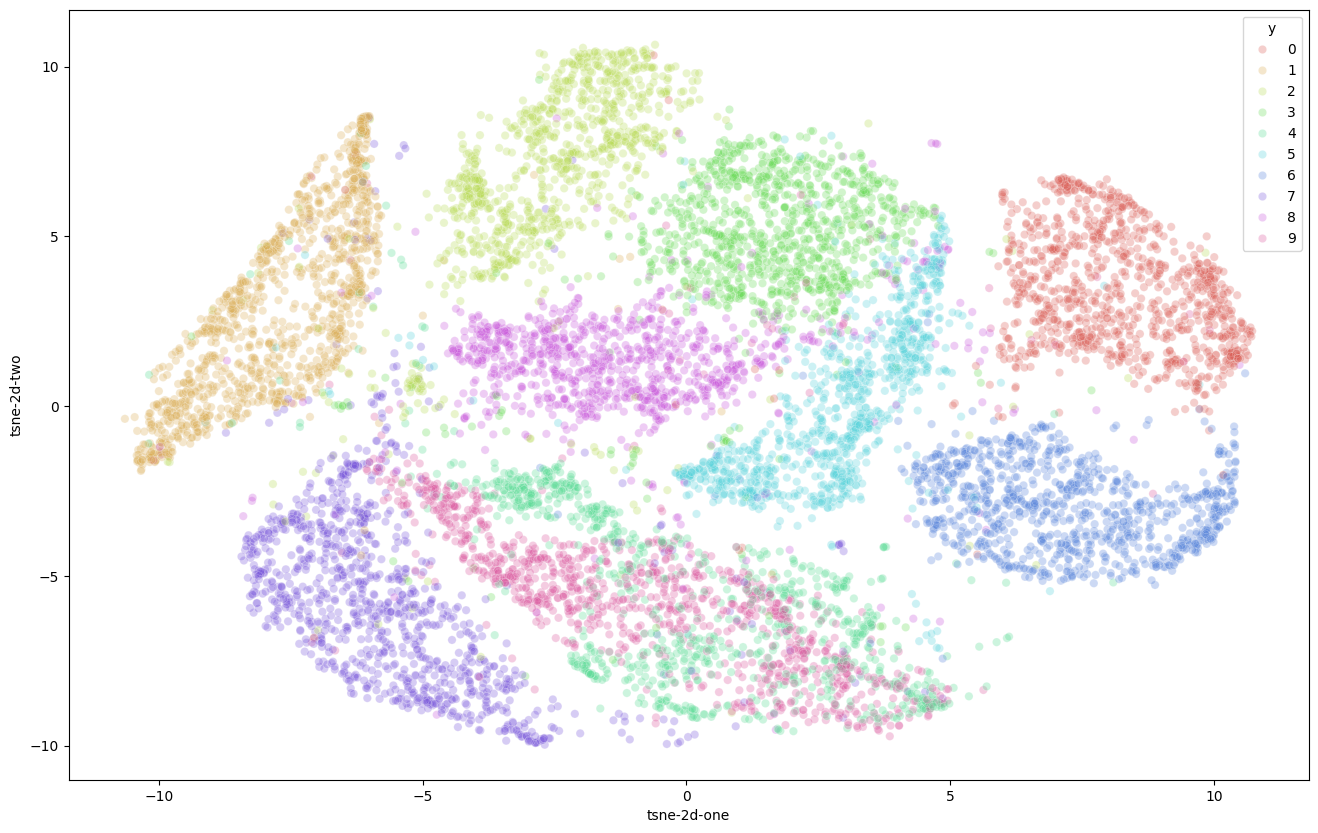

In [96]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

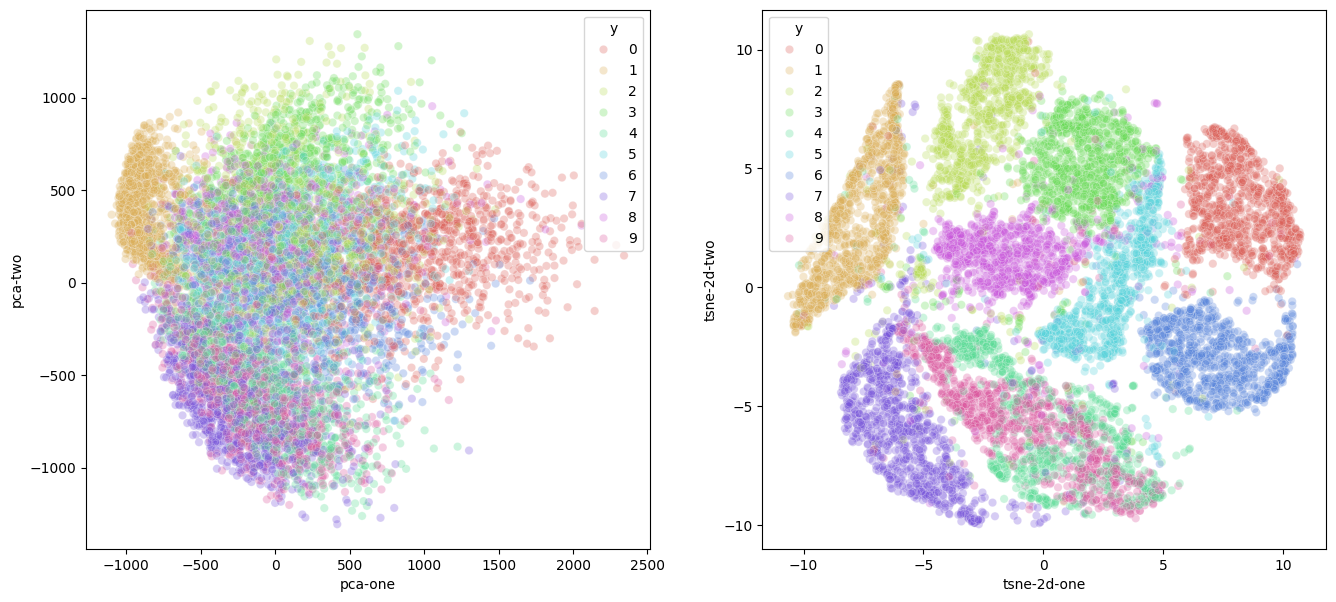

In [97]:
plt.figure(figsize=(16,7))

ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)

ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)